In [ ]:
#먼저 캐글 가입한다.
#account에서 api 토큰을 받는다
#거기서 받은 kaggle.json 파일을 실행한다. (아래 코드)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/base_command.py", line 167, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/commands/install.py", line 397, in run
    conflicts 

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"kimgeonyu","key":"bfbdcd7b31bc168eddfae4e56bc4590e"}'}

In [ ]:
# #json 파일 이동시키기.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#지난 대회 데이터셋 불러오기
#원래 구글 드라이브에 넣는 방법이 있지만 번거로워 이 방법을 쓴 것입니다~~
#해당 대회 -> data에 가보면 api 복사하는 곳이 있음
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 gender_submission.csv	 kaggle.json   test.csv      train.csv
'kaggle (1).json'	 sample_data   titanic.zip


In [ ]:
y
#zip 파일 풀기.
!unzip /content/titanic.zip

Archive:  /content/titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: gender_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
!ls

 gender_submission.csv	 kaggle.json   test.csv      train.csv
'kaggle (1).json'	 sample_data   titanic.zip


In [ ]:
#데이터셋 열기
# import pandas as pd
# import numpy as np

# train = pd.read_csv("/content/train.csv")
# train.info()

In [ ]:
# train.describe()

In [ ]:
import numpy as np #대규모 다차원 배열 가능하게 함. 효율적인 메모리 사용
import pandas as pd #데이터의 가독성을 높이고, 다양한 명령을 가능하게끔 한다.
import matplotlib.pyplot as plt #데이터를 시각화하는 방법.
import seaborn as sns #matplotlib 기반으로 좀 더 예쁘게 그래프를 그릴 수 있다.
plt.style.use("fivethirtyeight") #미리 정의된 스타일 테마를 사용하는 것.

#경고창 숨기기.
import warnings
warnings.filterwarnings('ignore')
#notebook을 실행한 브라우저에서 바로 보여주는 것.
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/train.csv") #csv 파일을 읽기.

In [ ]:
data.head() #head는 데이터의 5개를 보여주는 것.
/content/drive/MyDrive/ColabNotebooks/KEB_toy/  titanic2.ipynb

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull() #데이터 중에서 null(값이 없음)이 있는가를 보는 것

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum() #그 합을 본다. null은 데이터 처리에서 중요함. 평균을 넣든가 해서 없앤다.

#age와 cabin, embarked에서 null 값이 있으므로 수정해야겠다~~

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

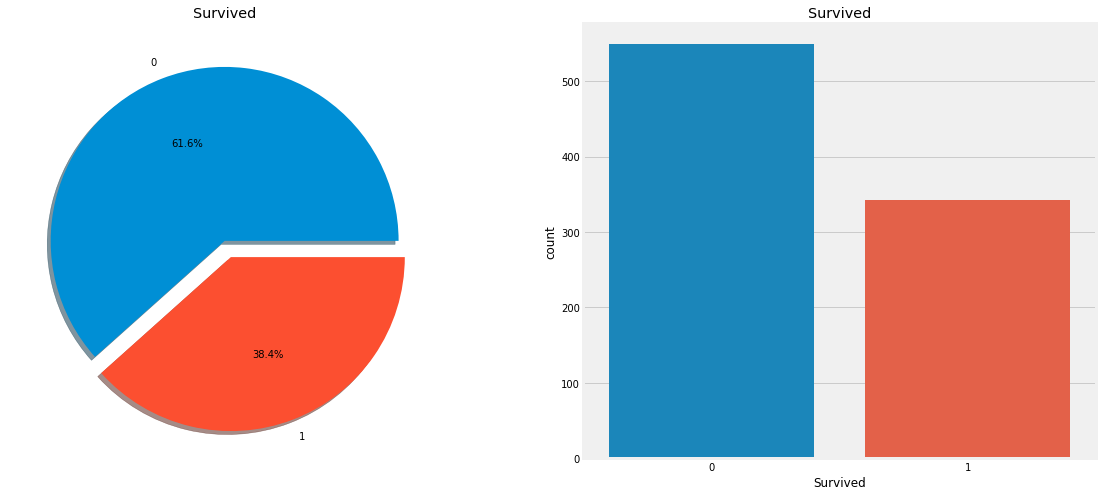

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8)) #row 1개, column 2개, 그림 사이즈 18,8
#f -> figure 데이터가 담기는 액자같은, ax -> axes 실제 데이터같은 느낌?
#틀을 잡아준다고 생각.

data["Survived"].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow= True)
#데이터에 survived 값들을 계산하고 이를 pie형태로 그린다. explode는 부채꼴이 파이 차트 중심에서 얼마나 벗어나느가
#autopct : 부채꼴 안에 숫자들 형태
#shadow는 그림자.
#ax = ax[0] : 그래프의 위치.

ax[0].set_title('Survived')
ax[0].set_ylabel('') #타이틀과 ylabel값 주기.

#여기까지가 파이

sns.countplot(x = "Survived", data = data, ax=ax[1])
#데이터의 Survived 열을 쓰며, data = data, ax[1]에 데이터 그리겠다.
ax[1].set_title("Survived")
plt.show()


많은 사람들이 죽었는데 특징들을 더 깊게 파보자.

In [ ]:
data.groupby(["Sex", "Survived"])["Survived"].count()
#sex와 survived를 하나의 그룹으로 묶고 그 그룹에서 survived 컬럼의 count를 멕인거

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

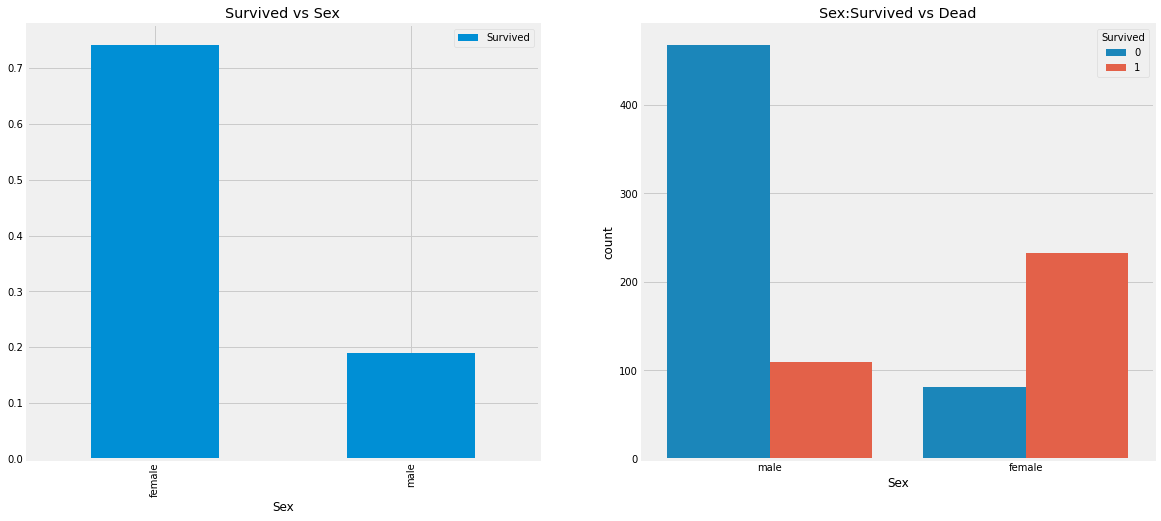

In [ ]:
f,ax = plt.subplots(1,2, figsize = (18,8))
data[["Sex", "Survived"]].groupby(["Sex"]).mean().plot.bar(ax=ax[0])
#data[["Sex", "Survived"]] : sex, survived만 있는 데이터셋을 만들고, 이를 sex로 그룹화하는거야
#이렇게 되면 성별에 따른 생존자를 알 수 있지.
#이건 시간이 없어서 
ax[0].set_title("Survived vs Sex")
sns.countplot(x = "Sex", hue = "Survived", data=data, ax=ax[1])
#sex의 열을 열고, survived로 구분한다.
ax[1].set_title("Sex:Survived vs Dead")
plt.show()

In [ ]:
#성별 정보가 예측하는데 매우 중요하다는 것을 알려줌.

In [ ]:
data.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
data["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap="summer_r")
#crosstab, Pclass와 survived를 crosstab 요소로 하며, margins : 행,열별 total을 주는 것, style 이후는 색깔 넣는거

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


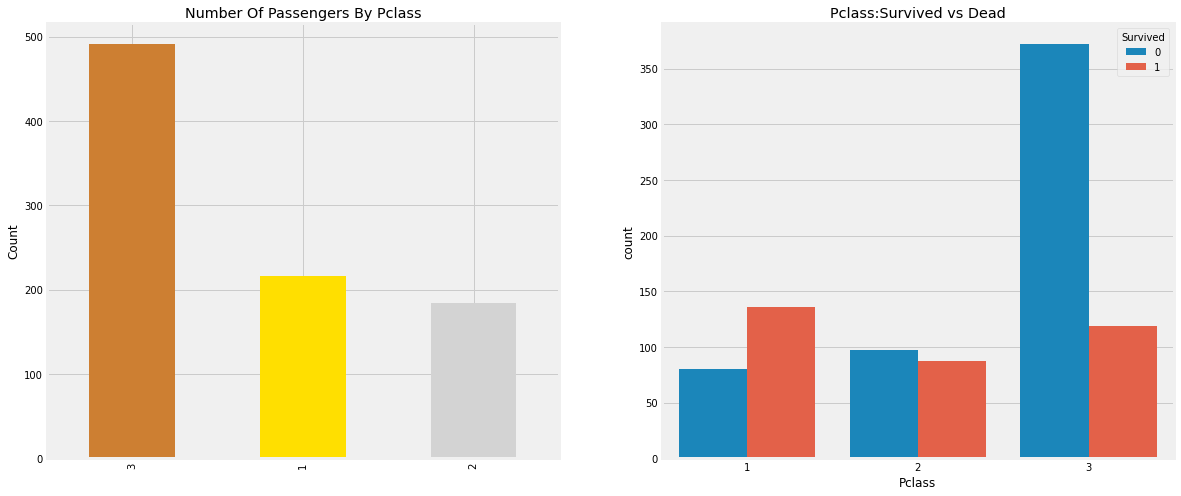

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data["Pclass"].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title("Number Of Passengers By Pclass")
ax[0].set_ylabel("Count")
sns.countplot(x ='Pclass', hue="Survived", data=data, ax=ax[1])
ax[1].set_title("Pclass:Survived vs Dead")
plt.show()

In [ ]:
#pclass이 생존확률에 영향을 주는구나, #0이 죽은거 1이 생존한거

In [ ]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap="summer_r")

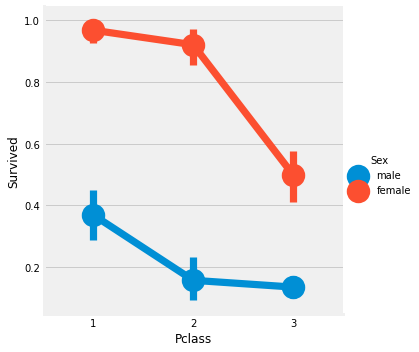

In [ ]:
sns.catplot(x ="Pclass", y = "Survived", hue="Sex", data = data, kind="point")
plt.show()

In [ ]:
print("Oldest Passenger was of : ", data["Age"].max(), 'Year')
print("Youngest Passenger was of : ", data["Age"].min(), 'Year')
print("average Passenger was of : ", data["Age"].mean(), 'Year')

Oldest Passenger was of :  80.0 Year
Youngest Passenger was of :  0.42 Year
average Passenger was of :  29.69911764705882 Year


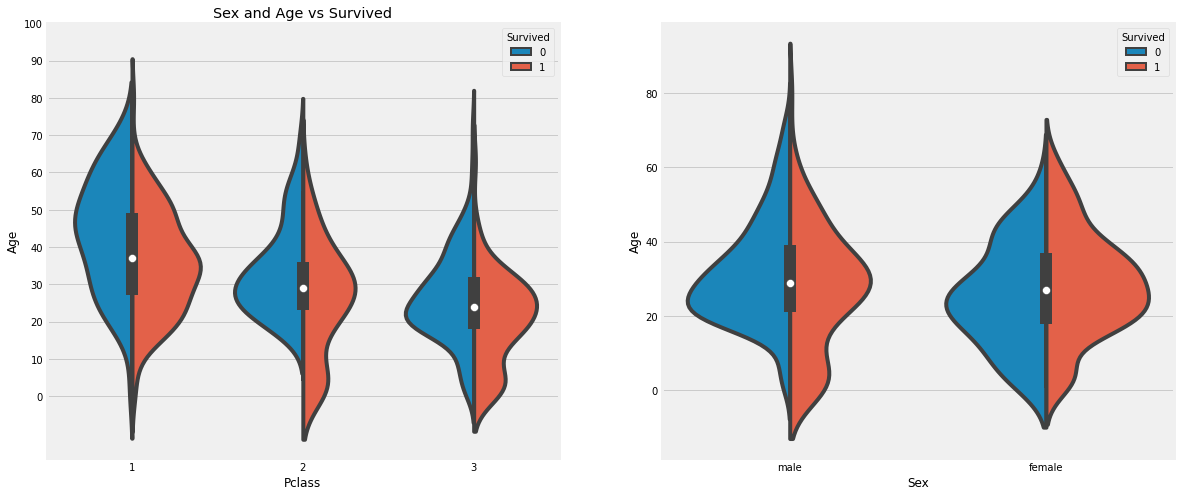

In [ ]:
f,ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot(x= "Pclass", y= "Age", hue="Survived", data = data, split= True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110, 10)) #y축 단위?

sns.violinplot(x= "Sex", y = "Age" , hue="Survived", data = data, split= True, ax=ax[1])
ax[0].set_title("Sex and Age vs Survived")
ax[0].set_yticks(range(0,110, 10)) #y축 단위?
plt.show()

In [ ]:
data["Initial"] = 0 #data에 initial 열을 만든다.
#Inital data에서 
for i in data:
  data["Initial"]=data.Name.str.extract("([A-Za-z]+)\.")

#앞서 나이 값이 null이 많았으므로 이름에 나와있는 mr, mrs 등으로 null값을 보충하자는 것.
#data를 돌면서 이름에서 .까지의 알파벳을 구하자는 거.


In [ ]:
data["Initial"]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [ ]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap="summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


이름에 따라 수정해주기, inplace=True는 오리지널 데이터에 수정한다는 의미.



In [ ]:
data.groupby("Initial")["Age"].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
data.loc[(data.Age.isnull()) &(data.Initial=="Mr"), "Age"] =33
data.loc[(data.Age.isnull()) &(data.Initial=="Mrs"), "Age"] =36
data.loc[(data.Age.isnull()) &(data.Initial=="Master"), "Age"] =5
data.loc[(data.Age.isnull()) &(data.Initial=="Miss"), "Age"] =22
data.loc[(data.Age.isnull()) &(data.Initial=="Other"), "Age"] =46

In [ ]:
data.Age.isnull().any()

False

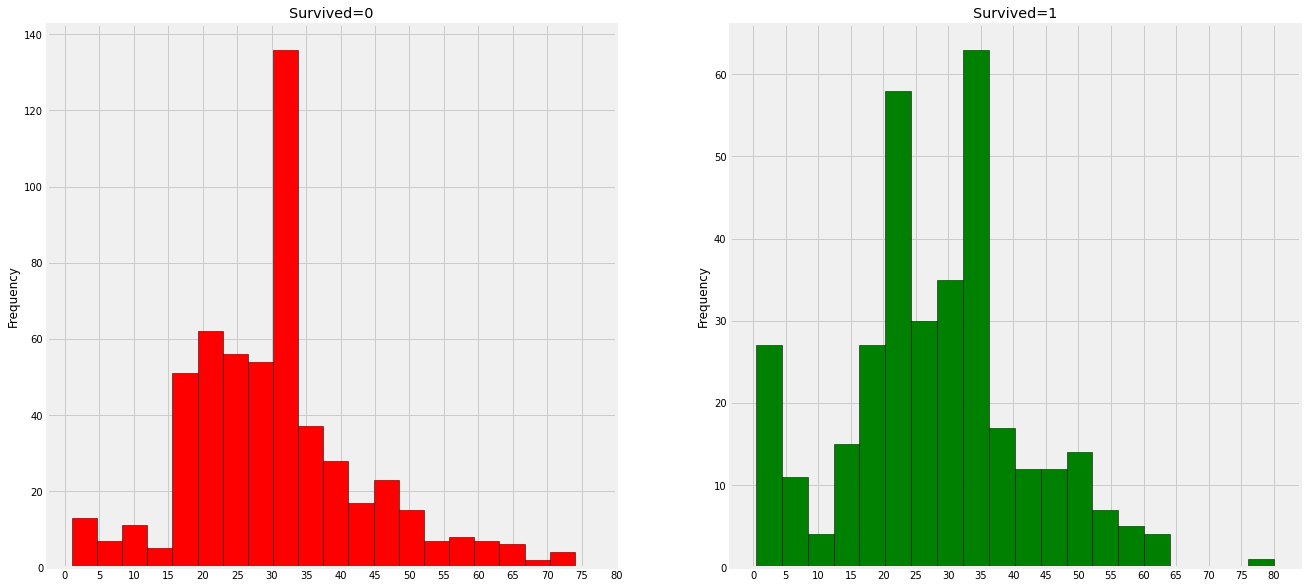

In [ ]:
f,ax = plt.subplots(1,2,figsize=(20,10))
data[data["Survived"] == 0].Age.plot.hist(ax=ax[0], bins = 20, edgecolor="black", color="red")
ax[0].set_title("Survived=0")
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

data[data["Survived"]==1].Age.plot.hist(ax=ax[1], bins = 20, edgecolor="black", color="green")
ax[1].set_title("Survived=1")
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

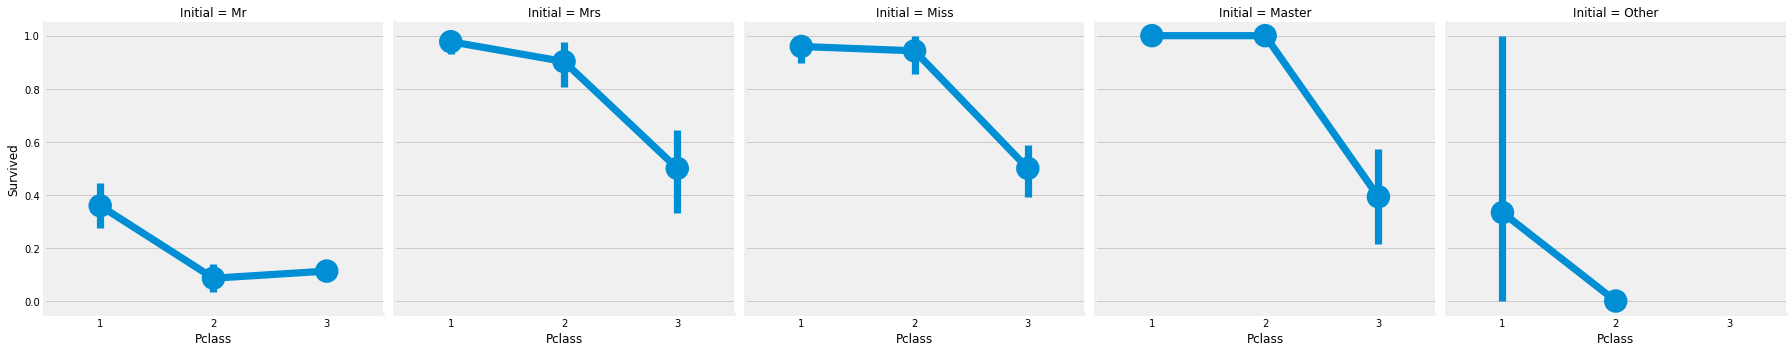

In [ ]:
sns.catplot(x="Pclass", y="Survived", col = 'Initial', data = data,kind="point")
plt.show()
#catplot으로 바뀌었으며, x축 y축 설정, "Initial 열에서 요소들을 뽑은 것,", data 데이터 사용, kind="point"를 써줘야함.

In [ ]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap="summer_r")
#embark : 승선한 항, 승산항 중에서 자리 등급으로/ 성별 중에서 생존 여부로

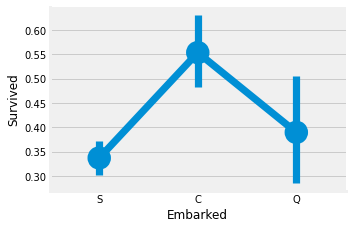

In [ ]:
sns.catplot( x= "Embarked", y= "Survived", data = data, kind="point")
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

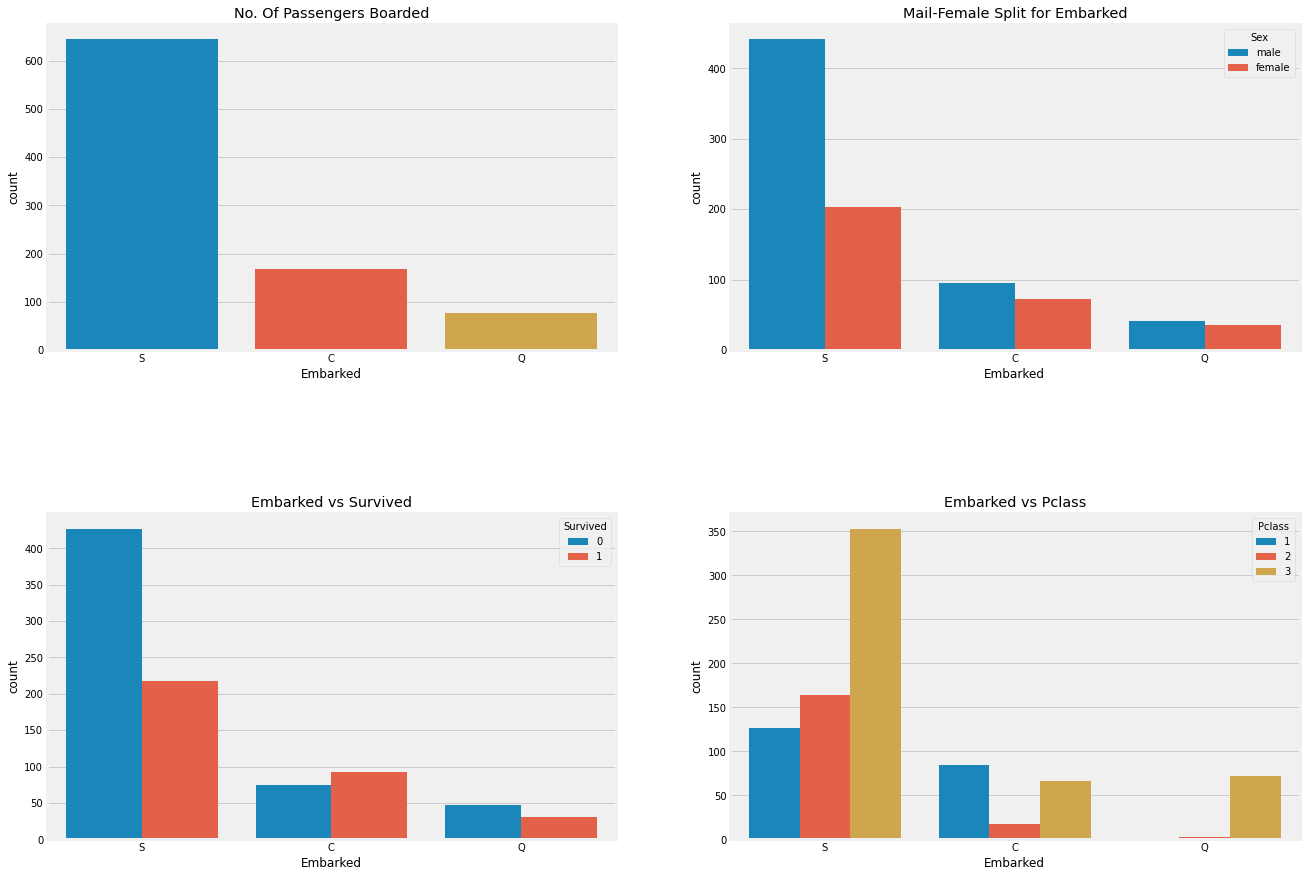

In [ ]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot(x = "Embarked", data = data , ax=ax[0,0])
ax[0,0].set_title("No. Of Passengers Boarded")

sns.countplot(x = "Embarked", hue = 'Sex', data = data , ax=ax[0,1])
ax[0,1].set_title("Mail-Female Split for Embarked")

sns.countplot(x = "Embarked", hue = "Survived", data = data , ax=ax[1,0])
ax[1,0].set_title("Embarked vs Survived")

sns.countplot(x = "Embarked", hue= "Pclass", data = data , ax=ax[1,1])
ax[1,1].set_title("Embarked vs Pclass")

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

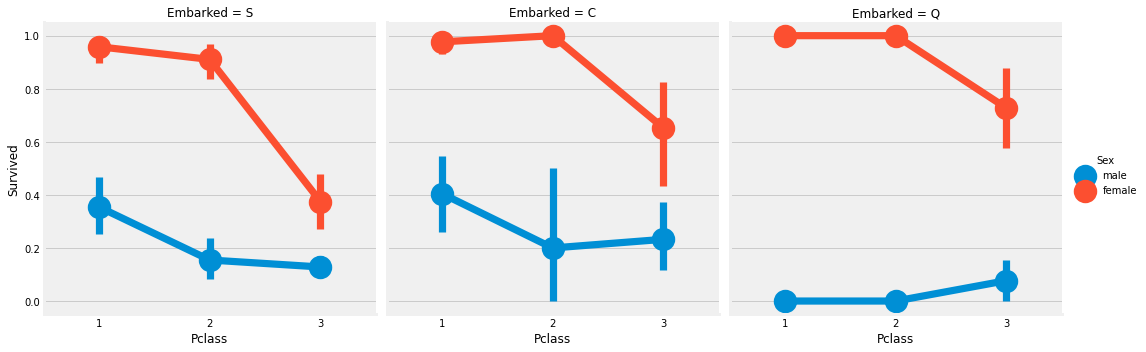

In [ ]:
sns.catplot(x="Pclass", y = "Survived", hue= "Sex", col="Embarked", data = data, kind="point")
plt.show()

In [ ]:
data["Embarked"].fillna("S", inplace=True)

In [ ]:
data.Embarked.isnull().any()

False

In [ ]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap="summer_r")
#[data.SibSp] [] 벗기나 안벗기나 차이 없음

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


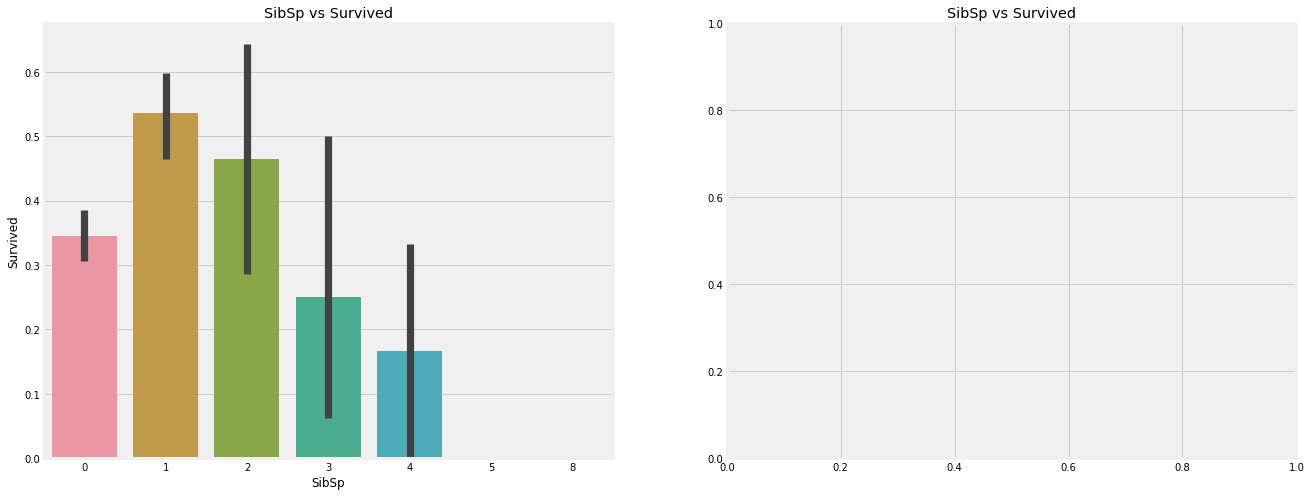

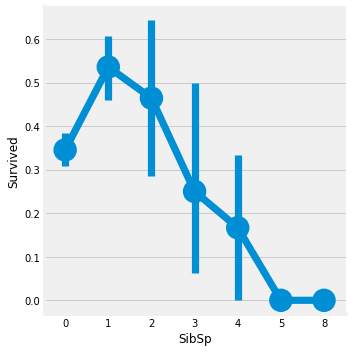

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x="SibSp", y="Survived", data=data, ax=ax[0])
ax[0].set_title("SibSp vs Survived")

sns.catplot(x="SibSp", y="Survived", data=data, kind="point", ax=ax[1])
ax[1].set_title("SibSp vs Survived")

#이거 오류를 모르겠네..?

plt.show()

In [ ]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap="summer_r")

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [ ]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap="summer_r")

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


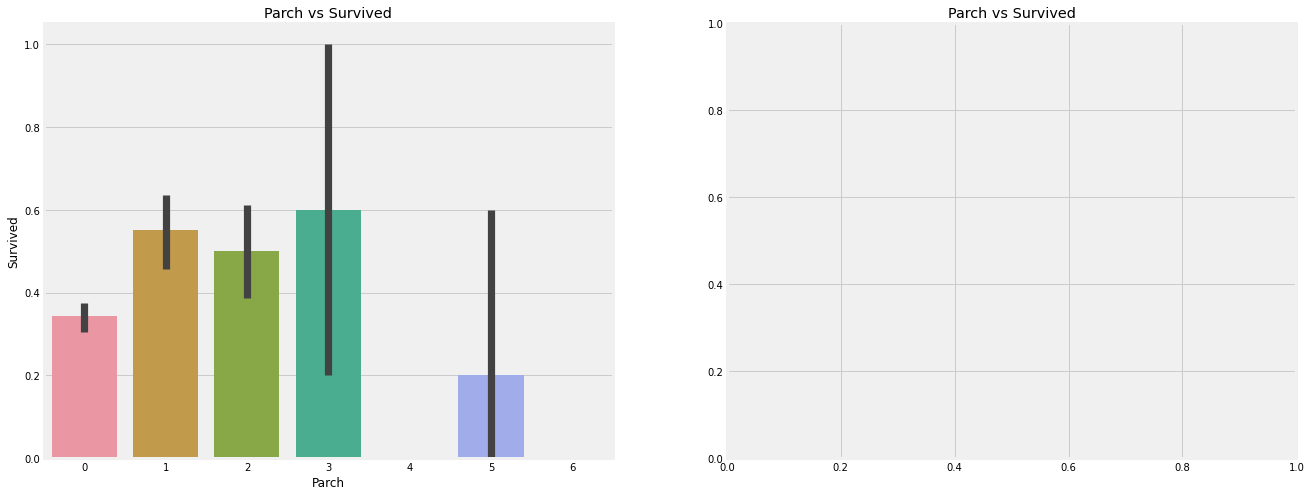

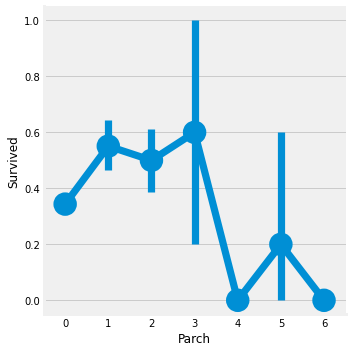

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x='Parch', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
#오류를 못찾겠어.
sns.catplot(x='Parch', y='Survived', data=data, kind='point', ax=ax[1])
ax[1].set_title('Parch vs Survived')
#검은 세로선은 신뢰구간 95퍼
plt.show()

In [ ]:
print("Highest Fare was : ", data["Fare"].max())
print("Lowest Fare was : ", data["Fare"].min())
print("Average Fare was : ", data["Fare"].mean())


Highest Fare was :  512.3292
Lowest Fare was :  0.0
Average Fare was :  32.204207968574636


Text(0.5, 1.0, 'Fares in Pclass 3')

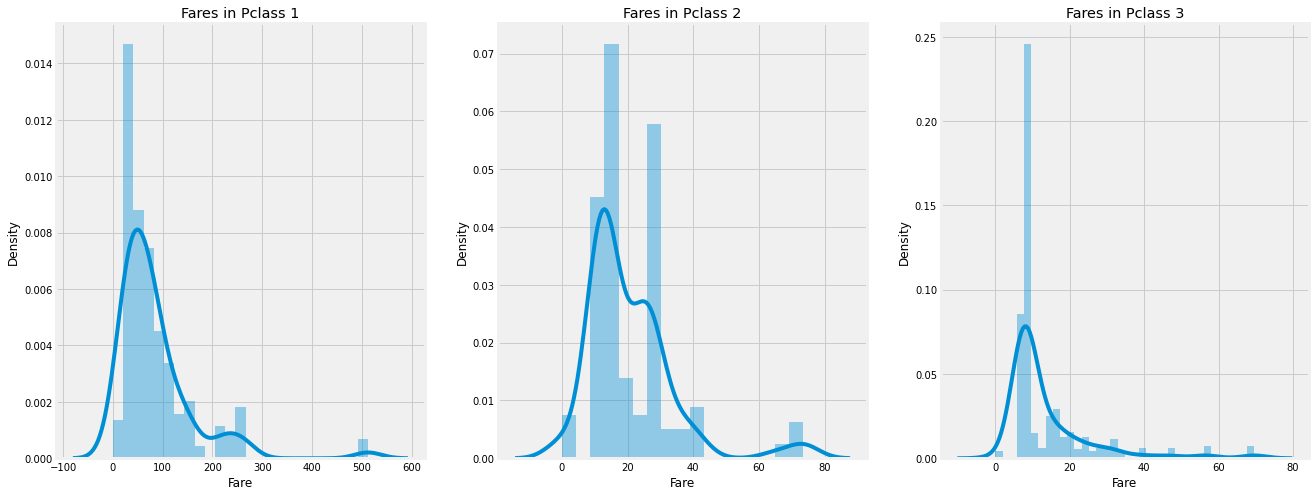

In [ ]:
f,ax = plt.subplots(1,3, figsize=(20,8))
#pclass가 1인 데이터들을 모은다..

sns.distplot(data[data["Pclass"] == 1].Fare, ax=ax[0])
ax[0].set_title("Fares in Pclass 1")

sns.distplot(data[data["Pclass"] ==2 ].Fare,ax=ax[1])
ax[1].set_title("Fares in Pclass 2")

sns.distplot(data[data["Pclass"] ==3 ].Fare,ax=ax[2])
ax[2].set_title("Fares in Pclass 3")

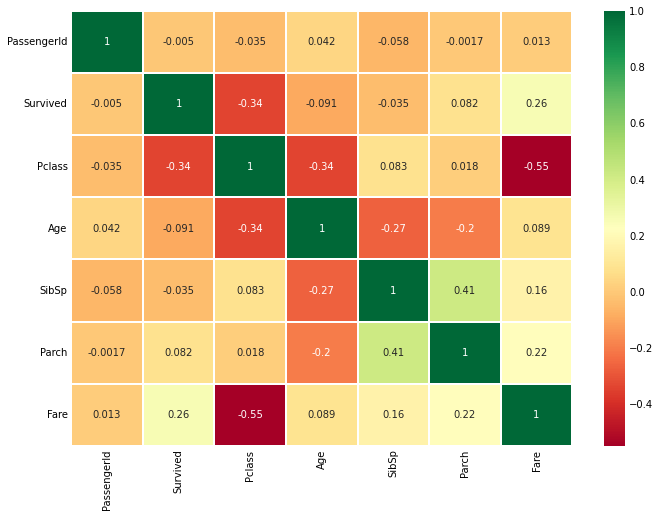

In [ ]:
sns.heatmap(data.corr(), annot= True , cmap="RdYlGn", linewidth=0.2)
fig = plt.gcf()
# figure을 많이 만들어 놓으면 어떤 figure이 있는지 알기 어려워진다. 현재 figure를 확인하기 위한 방법으로는 plt.gcf()를 사용한다
fig.set_size_inches(10,8)
plt.show()

In [ ]:
data["Age_band"] = 0
data.loc[data["Age"] <= 16, "Age_band"] = 0
data.loc[(data["Age"] > 16) & (data["Age"]<=32), "Age_band"] = 1
data.loc[(data["Age"] > 32) & (data["Age"]<=48), "Age_band"] = 2
data.loc[(data["Age"] > 48) & (data["Age"]<=64), "Age_band"] = 3
data.loc[data["Age"] >64, "Age_band"] = 4
data.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [ ]:
data["Age_band"].value_counts().to_frame().style.background_gradient(cmap="summer")

,Age_band
1,382
2,325
0,104
3,69
4,11


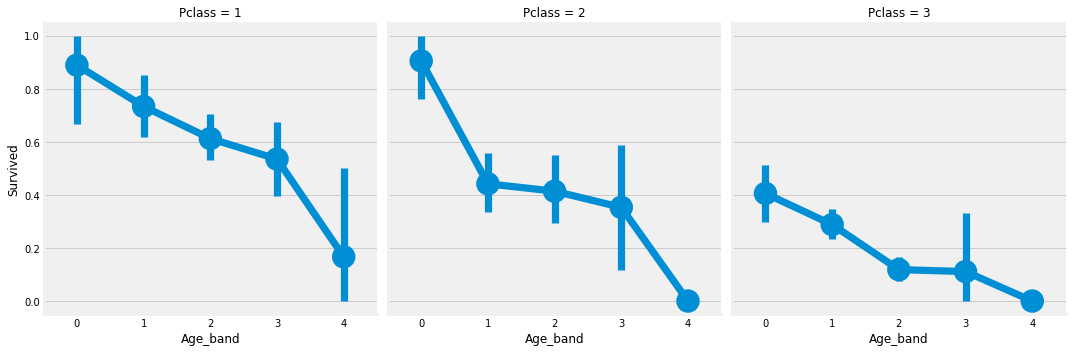

In [ ]:
sns.catplot(x="Age_band", y="Survived", data= data, col="Pclass", kind="point")
plt.show()

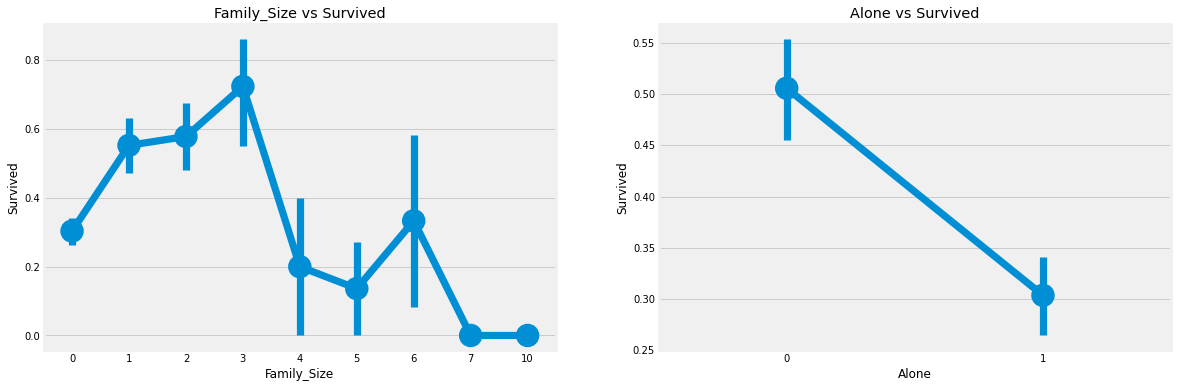

In [ ]:
# data["Family_Size"] = 0
# data["Famliy_Size"] = data["Parch"] + data["SibSp"]
# data["Alone"] = 0
# data.loc[data.Family_Size == 0, "Alone"] = 1 #loc 행을 접근, iloc 인덱스로 접근

# f,ax = plt.subplots(1,2, figsize=(18,6))
# sns.pointplot(x= "Family_Size", y = "Survived", data = data,ax=ax[0])
# ax[0].set_title("Family_Size vs Survived")

# sns.pointplot(x= "Alone", y = "Survived", data = data,ax=ax[1])
# ax[1].set_title("Alone vs Survived")
# plt.close(2)
# plt.close(3)
# plt.show()
data["Family_Size"] = data["Parch"] + data["SibSp"]
data["Alone"] = 0
data.loc[data.Family_Size == 0, "Alone"] = 1

f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.pointplot(x="Family_Size", y="Survived", data=data, ax=ax[0])
ax[0].set_title("Family_Size vs Survived")

sns.pointplot(x="Alone", y="Survived", data=data, ax=ax[1])
ax[1].set_title("Alone vs Survived")
plt.show()

#catplot은 fig객체를 반환하지 않으므로 ax = ax[0]이 없다. 그러니 pointplot을 써야한다.

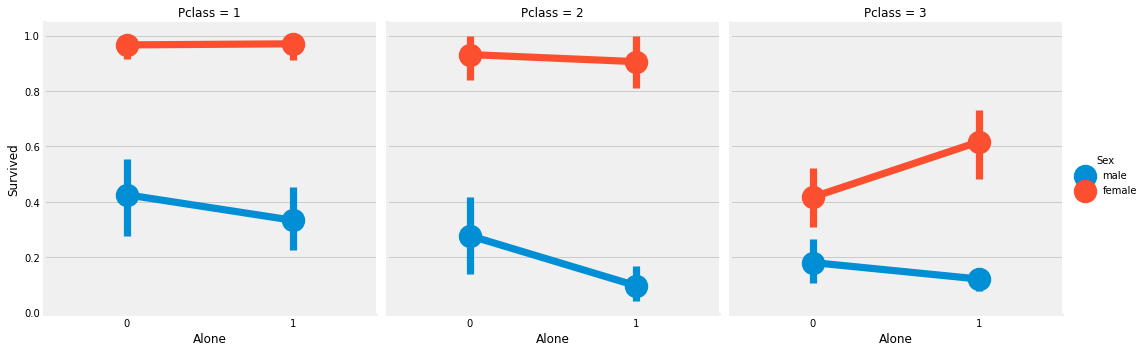

In [ ]:
sns.catplot(x="Alone", y = "Survived", data = data ,hue = "Sex", col="Pclass", kind="point")
plt.show()

In [ ]:
data["Fare_Range"] = pd.qcut(data["Fare"], 4)
data.groupby(["Fare_Range"])["Survived"].mean().to_frame().style.background_gradient(cmap="summer_r")

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [ ]:
data["Fare_cat"] = 0
data.loc[data["Fare"] <=7.91, "Fare_cat"] = 0
data.loc[(data["Fare"] > 7.91) & (data["Fare"] < 14.454), "Fare_cat"] = 1
data.loc[(data["Fare"] > 14.454) & (data["Fare"] < 31), "Fare_cat"] = 2
data.loc[(data["Fare"] > 31) & (data["Fare"] <=513), "Fare_cat"] = 3


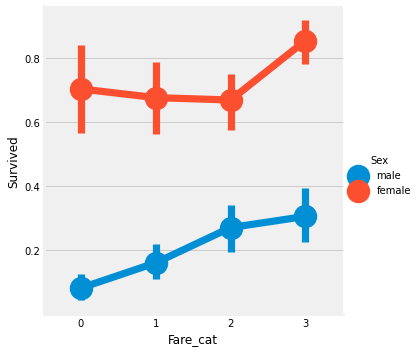

In [ ]:
sns.catplot(x="Fare_cat" , y = "Survived", data = data, hue = "Sex", kind="point")
plt.show()

In [ ]:
data["Sex"].replace(["male", "female"], [0,1], inplace=True)
data["Embarked"].replace(["S", "C", "Q"], [0,1,2], inplace=True)
data["Initial"].replace(["Mr", "Mrs","Miss","Master","Other"], [0,1,2,3,4], inplace=True)

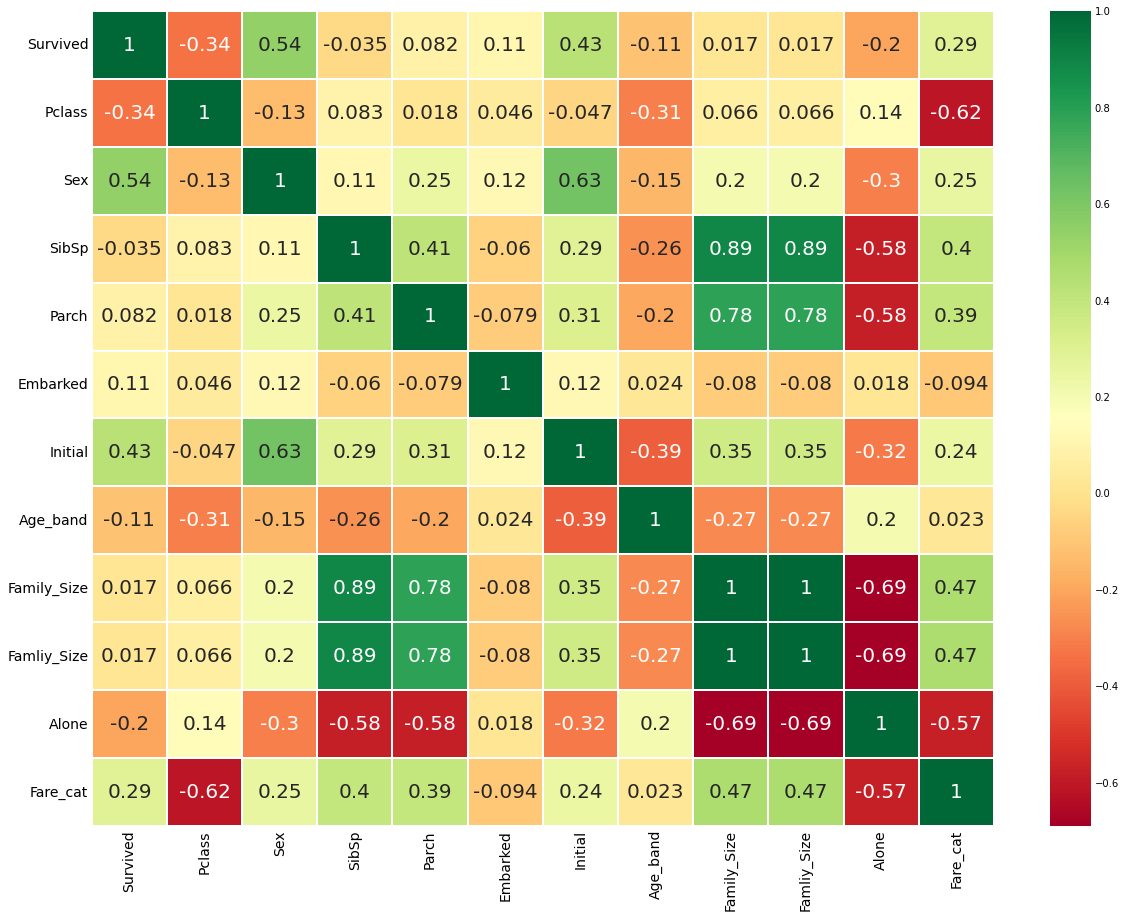

In [ ]:
#data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
#linewidth : 경계선 두께, annot : 값 표시할지, annot_kws : 추가적인 설정.
fig=plt.gcf()
#gcf는 현재 그림의 객체를 말하는건데 이 현재 그림의 크기를 조정하려고 하는것.
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0, stratify=data.Survived)
#[survived]는 리스트가 전달되고, 위와 같이 바꿔야함.
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data["Survived"]

In [ ]:
data.Sex

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [ ]:
model = svm.SVC(kernel= "rbf", C= 1, gamma=0.1)
#model에 train 값을 적용시킨다.
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is 0.835820895522388


In [ ]:
model = svm.SVC(kernel= "linear", C=0.1, gamma=0.1)
#model에 train 값을 적용시킨다.
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


In [ ]:
model = LogisticRegression()
#model에 train 값을 적용시킨다.
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for Linear Regression is',metrics.accuracy_score(prediction3,test_Y))

Accuracy for Linear Regression is 0.8134328358208955


In [ ]:
model = DecisionTreeClassifier()
#model에 train 값을 적용시킨다.
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

Accuracy for the Decision Tree is 0.8059701492537313


In [ ]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for KNN is',metrics.accuracy_score(prediction5,test_Y))

Accuracy for KNN is 0.8171641791044776


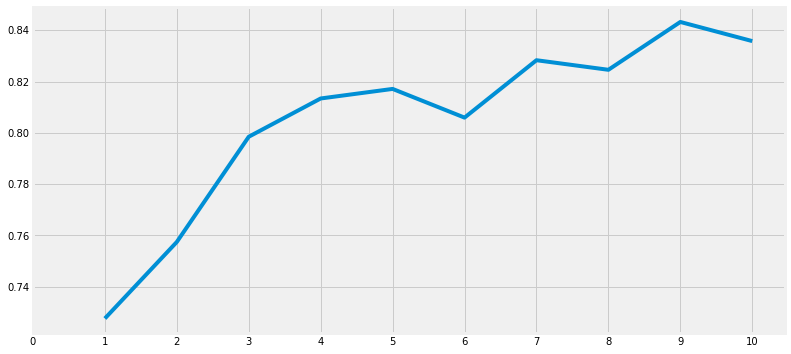

Accuracies for different values of n are: [0.72761194 0.75746269 0.79850746 0.81343284 0.81716418 0.80597015
 0.82835821 0.82462687 0.84328358 0.8358209 ] with the max value as  0.8432835820895522


In [ ]:
#몇개의 군집을 만들건지, 최적의 정확도를 알아내보자.
a_index = list(range(1,11))
a = pd.Series()
x= [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X, train_Y)
  prediction = model.predict(test_X)
  a = a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))

plt.plot(a_index,a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [ ]:
model= GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('Accuracy for NavieBayes is',metrics.accuracy_score(prediction6,test_Y))

Accuracy for NavieBayes is 0.8208955223880597


In [ ]:
model= RandomForestClassifier(n_estimators = 100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('Accuracy for randomforest is',metrics.accuracy_score(prediction7,test_Y))

Accuracy for randomforest is 0.8246268656716418


In [ ]:
from sklearn.model_selection import KFold #kfold : 교차검증 k-1개 까지의 데이터로 학습 후 나머지 하나로 검증
from sklearn.model_selection import cross_val_score #score 평가
from sklearn.model_selection import cross_val_predict

#일반적인 경우를 주기 위해서
kfold = KFold(n_splits=10)
xyz= [ ]
accuracy = []
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]

for i in models:
  model = i
  cv_result = cross_val_score(model, X,Y,cv = kfold, scoring="accuracy")
  cb_result = cv_result
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({"CV Mean" : xyz, "Std" : std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.792347,0.045930
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.810424,0.042707
Decision Tree,0.811473,0.031120
Naive Bayes,0.800262,0.026626
Random Forest,0.815955,0.031740


<Axes: >

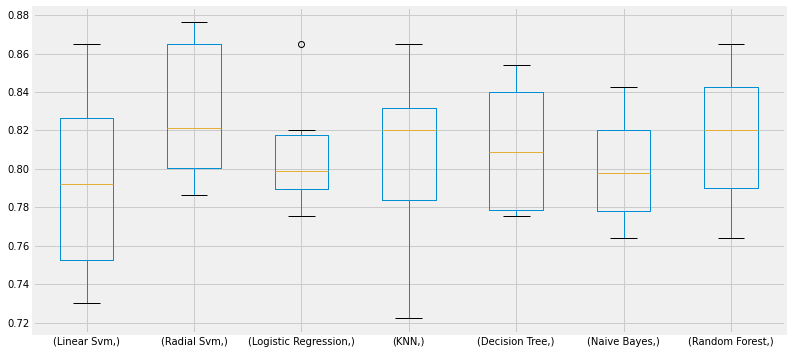

In [ ]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
#역변환이라고 하나 T는 traspose한 거
box.T.boxplot()

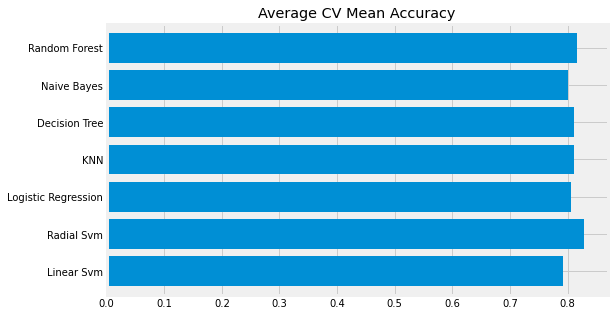

In [ ]:
new_models_dataframe2["CV Mean"].plot.barh(width=0.8)
plt.title("Average CV Mean Accuracy")
fig= plt.gcf()
fig.set_size_inches(8,5)
plt.show()

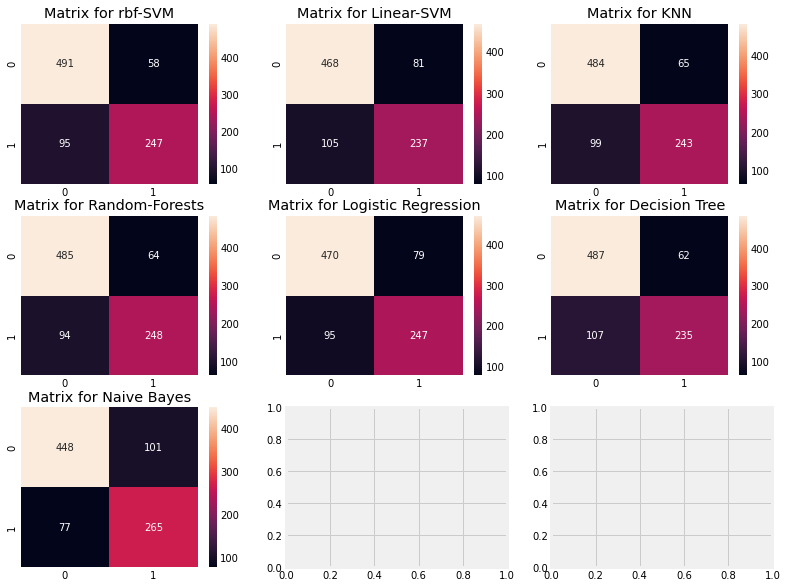

In [ ]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']

hyper={"kernel" : kernel, "C" : C, "gamma" :gamma}
gd = GridSearchCV(estimator = svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8293829640323898
SVC(C=1, gamma=0.1)


In [ ]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8204506936162199
RandomForestClassifier(n_estimators=400, random_state=0)


In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators = [("KNN", KNeighborsClassifier(n_neighbors=10)),
                                                  ("RBF", svm.SVC(probability=True, kernel="rbf", C= 0.5, gamma = 0.1)),
                                                  ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                                  ('LR',LogisticRegression(C=0.05)),
                                                  ('NB',GaussianNB()),
                                                  ('svm',svm.SVC(kernel='linear',probability=True))], voting='soft').fit(train_X,train_Y)


In [ ]:
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.832089552238806
The cross validated score is 0.8215480649188514


In [ ]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.8283582089552238
The cross validated score for bagged KNN is: 0.8182896379525593


In [ ]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8227590511860174


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state = 0, learning_rate = 0.1)
result = cross_val_score(ada, X,Y, cv = 10, scoring="accuracy")
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8160299625468165


In [ ]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8204993757802747


In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8260184545853996
AdaBoostClassifier(learning_rate=0.05, n_estimators=200)


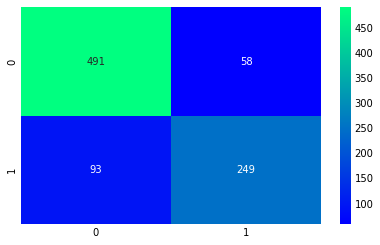

In [ ]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

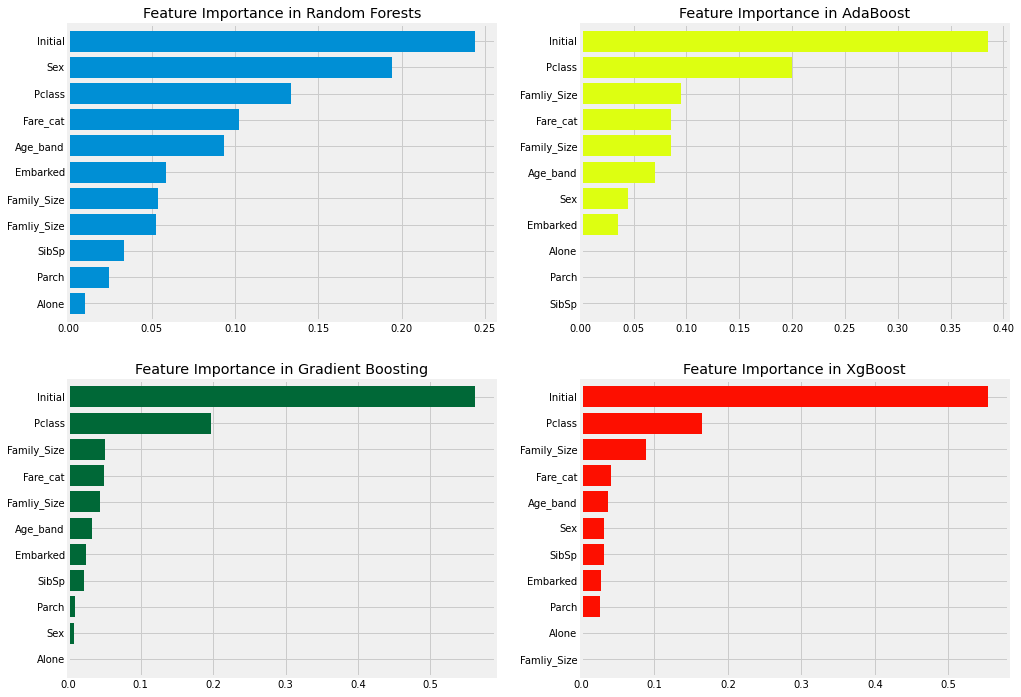

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
#feature의 중요도 값, 그 중요도 값에 해당하는 열의 값..
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()
